# PAUTA Laboratorio 2.1: Clasificación

Hernán Sarmiento, Andrés Abeliuk, Alison Fernandez, Cinthia Sánchez, Johnny Godoy, Gabriel Ramos, Cristian Llull y Matías Rojas

Octubre 2021

# Instrucciones


1. Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda. 

3. El formato de entrega para esta actividad es un archivo html. **Genere un archivo HTML** usando jupyter (ver tutorial 2) y súbalo a U-Cursos. Basta con que uno de los integrantes haga la entrega. Si ambos hacen una entrega en U-Cursos, se revisará cualquiera de éstas.

# Estructura del laboratorio

Este laboratorio está conformado por preguntas teóricas de temas vistos en clases y preguntas prácticas (donde se requiere completar código) intercaladas con preguntas de interpretación de resultados y análisis. La parte práctica se divide en: 

1. Explorar los datos.
2. Entrenar un clasificador de 3 maneras:
    - Entrenando/Testeando con los mismos datos,
    - Dividiendo el dataset en una parte para entrenar y otra para testear, y
    - Usando cross-validation. 

# Teoría

#### 1. Un consultor en minería de datos tiene la siguiente estrategia al momento de enfrentar un problema de clasificación: probar todos los modelos posibles hasta encontrar uno que tenga cero error de entrenamiento. Comente la estrategia del consultor y proponga una estrategia alternativa.

**Respuesta:** El problema es over-fitting. Solución: cross-validation o hold-out.

#### 2. El mismo consultor siempre usa la misma métrica para evaluar un modelo: accuracy. Comente la estrategia del consultor y proponga una estrategia alternativa.

**Respuesta:** Accuracy es malo para datos desbalanceados. Se recomienda usar F1 o reportar la curva ROC.

# Parte 1: Explorar los datos

Usaremos el **Wine Dataset**, que viene en **scikit-learn**. Ejecutaremos la siguiente línea de código para importar la librería que nos permitirá cargarlo.

In [1]:
from sklearn.datasets import load_wine

## Pregunta 1.1

Cargue los datos e indique lo siguiente:
* Tamaño del dataset (cantidad de instancias y atributos). 
* ¿Cuántas clases hay y cuáles son sus nombres?
* ¿Cuántas instancias hay en cada clase?

Indique en cada caso cómo obtuvo la respuesta, es decir, adjunte código.

### Respuesta a pregunta 1.1

In [2]:
#######PAUTA#######
# Si ejecutamos el código que está más abajo tendremos las respuestas a cada pregunta

wine = load_wine()
print(wine.DESCR)

######FIN PAUTA######

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## Pregunta 1.2

Explique:
- ¿Qué hacen las siguientes líneas de código?
- ¿Qué nos muestra este gráfico? 
- ¿Cuáles son las principales observaciones que puede obtener sobre los datos a partir de los gráficos?

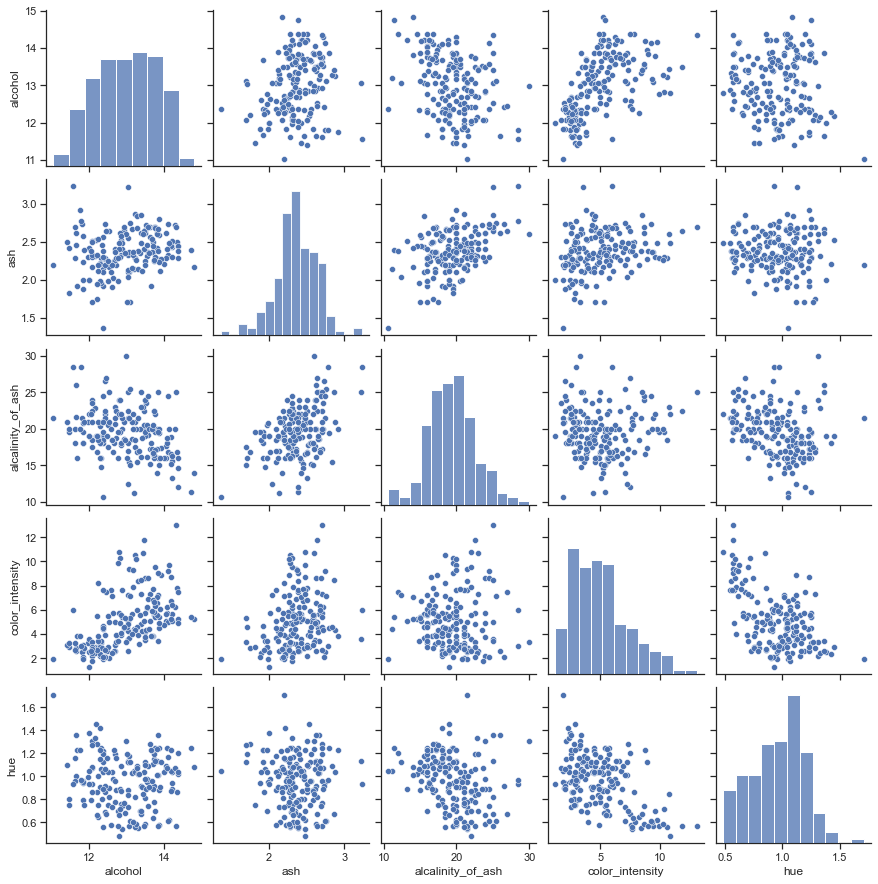

In [3]:
## EJECUTAR ESTE BLOQUE

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd

wine = load_wine()
data = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])

data['target'] = wine['target']
data['class'] = data['target'].map(lambda ind: wine['target_names'][ind])

g = sns.pairplot(data.iloc[:, [0,2,3,9,10]]) # Parametro kind="reg" agrega una recta
plt.show()

### Respuesta a pregunta 1.2

** PAUTA **

Carga el wine dataset y muestra un gráfico de dispersión de columnas específicas. 

El gráfico de dispersión nos muestra cómo están distribuidos ciertos atributos del dataset al analizar pares de estos. Si existieran correlaciones entre pares de atributos, se apreciaría que los puntos tienden a formar una recta. Basado en lo anterior, los atributos que podrían tener una leve correlación son:
- **alcohol** con **color_intensity**
- **ash** con **alcalinity_of_ash** 
- **hue** con **color_intensity**

Por otro lado, la diagonal muestra un histograma de la frecuencia que tiene cada valor en el respectivo atributo.

** FIN PAUTA **



# Parte 2: Entrenar/testear clasificadores

En esta parte useremos el clasificador **Decision Tree**. Veremos distintas formas de usarlo, y vamos a compararlas utilizando diversas métricas. 

## CLASIFICADOR 1

## Pregunta 2.1

Usando el siguiente código, complete lo que falta para entrenar el clasificador con los datos cargados (X, y) y hacer una predicción sobre los mismos datos empleando dicho clasificador entrenado. Luego, muestre las métricas de **accuracy**, **precision**, **recall** y **f1-score**.

In [4]:
## RESPUESTA PREGUNTA 2.1

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier()

X = wine.data      ## datos, caracteristicas o features 
y = wine.target    ## clase para cada instancia anterior

# .... COMPLETE ACA


######PAUTA#######

clf.fit(X, y)   
y_pred = clf.predict(X)
print("Accuracy:", accuracy_score(y, y_pred)) 
print(classification_report(y, y_pred))

#######FIN PAUTA#######

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



## Pregunta 2.2

De acuerdo a las métricas obtenidas: 

1. ¿Qué opina sobre las predicciones? 
2. ¿Qué problema puede identificar?

### Respuesta a pregunta 2.2
::
::

**PAUTA**

Todas las métricas calculadas (precision, recall, f1-score) tienen buenos resultados ya que son cercanos a 1. Sin embargo, hay que tener en consideración que estamos entrenando y testeando sobre el mismo dataset. En un ambiente real es de esperar que el modelo se utilice sobre datos no necesariamente vistos en el conjunto de entrenamiento. El resultado de un modelo sobre el mismo conjunto que se entrenó no es una buena forma de evaluarlo. Puede reportar buenos resultados y ser un caso de overfitting. Lo ideal sería entrenar con un dataset y testear con otro.

**FIN PAUTA**

::
::

## CLASIFICADOR 2

Ahora lo que haremos será dividir nuestro dataset en 70% entrenar (***training set***) y 30% para testear (***testing set***). Use la función ***train_test_split()*** de *sklearn* y utilice las variables `X_train, X_test, y_train, y_test`.

## Pregunta 2.3

Escriba el código necesario para dividir los datos, entrenar el modelo e indicar el **accuracy**, **precision** y **recall** del clasificador. 
Entrene usando el ***training set*** y pruebe sobre el ***testing set***, en base a la división 70%-30%, respectivamente 

**NOTA: para dividir el dataset use el parámetro `stratify=y`.**

In [5]:
### Respuesta a pregunta 2.3
# ...
# Recuerde usar las variables X_train, X_test, y_train, y_test

#########PAUTA###########

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=15, stratify=y)
clf.fit(X_train, y_train)   
y_pred = clf.predict(X_test)
print("Accuracy en test set:", accuracy_score(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

#######FIN PAUTA###########


Accuracy en test set: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      0.90      0.93        21
           2       0.88      0.93      0.90        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



## Pregunta 2.4

Según el resultado obtenido en la pregunta anterior, responda lo siguiente:

1. ¿Cuál clasificador tiene peores resultados? ¿Por qué?
2. ¿Cuál de las dos formas de entrenar el clasificador prefiere? Justifique su respuesta

### Respuesta a pregunta 2.4

***PAUTA***

Este último (donde se divide en train y test) tiene 'peores resultados' en términos numéricos, porque está intentando generalizar en vez de memorizar. Dicho de otra forma, porque está siendo evaluado en datos que no vio durante el entrenamiento.

Preferimos la segunda opción cuando queremos un clasificador que puede generalizar a valores que no ha visto antes, sabiendo aproximadamente cuál sería el desempeño esperado.


***FIN PAUTA***

## Pregunta 2.5

El siguiente código genera una matriz de confusión de los resultados de clasificación de la pregunta 2.4. Ejecute el bloque completo para visualizar el gráfico. Interprete la matriz y comente sobre cada uno de los valores distintos de 0 en la matriz y describa lo que representa.

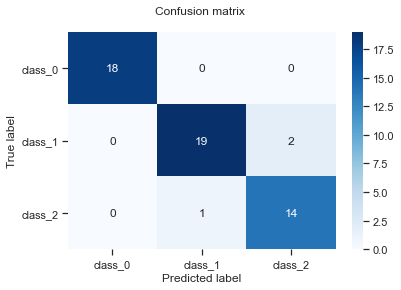

In [6]:
## EJECUTAR ESTE BLOQUE

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Compute confusion matrix. By default is not normalized (normalize=None)
# If necessary change 'y_pred' according to your variable name
cm = confusion_matrix(y_test, y_pred) 

# Only use the labels that appear in the data
classes = wine.target_names[unique_labels(y_test, y_pred)]

df = pd.DataFrame(cm, index = classes, columns = classes)

g = sns.heatmap(df, annot=True, cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)

plt.title('Confusion matrix \n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.autoscale()

### Respuesta a pregunta 2.5
::
::


***PAUTA***

Deberían indicar los errores que esta cometiendo el clasificador. Cuantos ejemplos de la clase i están mal clasificandos en la clase j. Para la diagonal son los casos que esta clasificando correctamente en su clase.

***FIN PAUTA***


## CLASIFICADOR 3

Para este clasificador utilizaremos Cross-validation. Con cross-validation, el conjunto de entrenamiento se divide en $k$ conjuntos disjuntos; se entrena sobre los datos correspondientes a $k-1$ de éstos, y se evalúa sobre el conjunto restante. Esto se repite $k$ veces, evaluando siempre sobre un conjunto distinto. Teniendo en cuenta el parámetro $k$, a éste método se le llama $k$-fold cross-validation.

El código que está a continuación realizará 10-fold cross-validation usando Decision Tree sobre los datos. La forma de estimar el rendimiento del clasificador es, entre otras cosas, calculando el promedio de todos los k-folds.

Además se muestra la predición sobre los datos para testear. 

In [7]:
## EJECUTAR ESTE BLOQUE

from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
cv_results = cross_validate(clf, X, y, cv = 10, scoring = scoring, return_train_score= True)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary:', np.mean(cv_results['test_accuracy']))

#Si quisieramos mostrar el resultado de cada k-fold, deberiamos quitar la 
#funcion np.mean la cual retorna el promedio. Esto mostraría una lista con el resultado de cada fold

Promedio Precision: 0.8917460317460316
Promedio Recall: 0.8782539682539683
Promedio F1-score: 0.8706775631775632
Promedio Accucary: 0.8705882352941178


## Pregunta 3.1

- Compare los valores de las métricas con respecto a lo obtenido en la pregunta 2.4 y comente en qué difieren y por qué.

- ¿Qué beneficios tiene emplear cross-validation?

### Respuesta a pregunta 3.1

:: 

::

***PAUTA***


Las métricas obtenidas con cross-validation son ligeramente menores porque se espera tener menor overfitting, al evaluar distintos y múltiples escenarios.

Al usar diferentes sub samples de datos para entrenar y testear, los resultados son estadisticamente más confiables (menos sesgados).

***FIN PAUTA***